## Creating the threshold analysis and logistic regression analysis:

In [1]:
library(pROC)
library(BBmisc)
library(caret)
library(dplyr)
library(glmm)

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘dplyr’

The following objects are masked from ‘package:BBmisc’:

    coalesce, collapse

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: trust
Loading required package: mvtnorm
Warning message:
“package ‘mvtnorm’ was built under R version 3.4.1”Loading required package: Matrix
Loading required package: digest


In [2]:
data = read.csv('../../AnnotateData/recgli_annotation10_onlyGoodBiopsies_alt1.csv')
dim(data)

[1] 366  75

In [3]:
data = data[data$outcome == "rHGG" | data$outcome == "txe", ]
dim(data)

[1] 297  75

In [4]:
data = data[data$CELorNEL == "CEL" | data$CELorNEL == "NEL",]
dim(data)

[1] 291  75

In [5]:
data = droplevels.data.frame(data)

In [6]:
id = "t_number_y"
features = c('nadc.1', 'nfa.1',
             'cbvn_nlin', 
             'ccri', 'cni', 'ncre', 'ncho', 'nnaa', 
             'in_CEL', 'newdata')
label = 'outcome'

In [7]:
data_xy = data[,c(id, features, label)]
head(data_xy)

,t_number_y,nadc.1,nfa.1,cbvn_nlin,ccri,cni,ncre,ncho,nnaa,in_CEL,newdata,outcome
1,10366,0.75,0.83,1.08,1.88,2.60,0.47,1.03,0.46,0,1,txe
3,10448,1.62,0.50,2.43,NA,NA,NA,NA,NA,1,1,rHGG
4,10594,2.62,0.81,1.64,NA,NA,NA,NA,NA,0,1,txe
5,10594,2.12,0.42,0.95,1.03,3.27,0.79,1.04,0.36,0,1,rHGG
6,10594,1.60,0.73,0.84,2.33,7.57,1.07,1.61,0.13,0,1,rHGG
7,10594,3.03,0.42,0.42,2.13,4.37,1.21,1.89,0.74,0,1,rHGG


## missing value indicators: 

In [8]:
data_xy = data.frame(data_xy, 
                    hasDiffu = ifelse(is.na(data_xy$nadc.1), 0, 1), 
                    hasPerf  = ifelse(is.na(data_xy$cbvn_nlin), 0, 1), 
                    hasSpec  = ifelse(is.na(data_xy$cni), 0, 1))

## fold splits: 

In [9]:
# 11, 32
set.seed(32)
## 32 allows for good splitting.

In [10]:
tnum_group_assignment = data.frame(t_number_y = unique(data[,id]), fold =floor(runif(length(unique(data[,id])), min = 1, max = 6)))

In [11]:
data_xy_split = merge(data_xy, tnum_group_assignment, by = c("t_number_y"))

In [12]:
data = data_xy_split

In [13]:
table(data$outcome)['txe']/length(data$outcome)

txe 
0.2371134

In [14]:
print('fold 1')
table(data$outcome[data$fold ==1])['txe']/length(data$outcome[data$fold ==1])
print('fold 2')
table(data$outcome[data$fold ==2])['txe']/length(data$outcome[data$fold ==2])
print('fold 3')
table(data$outcome[data$fold ==3])['txe']/length(data$outcome[data$fold ==3])
print('fold 4')
table(data$outcome[data$fold ==4])['txe']/length(data$outcome[data$fold ==4])
print('fold 5')
table(data$outcome[data$fold ==5])['txe']/length(data$outcome[data$fold ==5])

[1] "fold 1"


txe 
0.2903226

[1] "fold 2"


txe 
0.2698413

[1] "fold 3"


txe 
0.2105263

[1] "fold 4"


txe 
0.1833333

[1] "fold 5"


txe 
0.2244898

In [15]:
data_cel = data[which(data$in_CEL == 1),]

In [16]:
data_nel = data[which(data$in_CEL == 0),]

In [17]:
print('fold 1')
table(data_cel$outcome[data_cel$fold ==1])['txe']/length(data_cel$outcome[data_cel$fold ==1])
print('fold 2')
table(data_cel$outcome[data_cel$fold ==2])['txe']/length(data_cel$outcome[data_cel$fold ==2])
print('fold 3')
table(data_cel$outcome[data_cel$fold ==3])['txe']/length(data_cel$outcome[data_cel$fold ==3])
print('fold 4')
table(data_cel$outcome[data_cel$fold ==4])['txe']/length(data_cel$outcome[data_cel$fold ==4])
print('fold 5')
table(data_cel$outcome[data_cel$fold ==5])['txe']/length(data_cel$outcome[data_cel$fold ==5])

[1] "fold 1"


txe 
0.2647059

[1] "fold 2"


txe 
0.275

[1] "fold 3"


txe 
0.1612903

[1] "fold 4"


txe 
0.1818182

[1] "fold 5"


txe 
0.1666667

In [18]:
print('fold 1')
table(data_nel$outcome[data_nel$fold ==1])['txe']/length(data_nel$outcome[data_nel$fold ==1])
print('fold 2')
table(data_nel$outcome[data_nel$fold ==2])['txe']/length(data_nel$outcome[data_nel$fold ==2])
print('fold 3')
table(data_nel$outcome[data_nel$fold ==3])['txe']/length(data_nel$outcome[data_nel$fold ==3])
print('fold 4')
table(data_nel$outcome[data_nel$fold ==4])['txe']/length(data_nel$outcome[data_nel$fold ==4])
print('fold 5')
table(data_nel$outcome[data_nel$fold ==5])['txe']/length(data_nel$outcome[data_nel$fold ==5])

[1] "fold 1"


txe 
0.3214286

[1] "fold 2"


txe 
0.2608696

[1] "fold 3"


txe 
0.2692308

[1] "fold 4"


txe 
0.1851852

[1] "fold 5"


txe 
0.28

## thresholding: 

### NEL 

#### Choline:

In [19]:
scores_nel = data.frame(param = NA, 
                        folds = NA, 
                        thresh = NA,
                        auc_4folds = NA,
                        ci1_4folds = NA, 
                        ci2_4folds = NA,
                        
                        acc_4folds = NA,
                        sens_4folds = NA, 
                        spec_4folds = NA, 
                        ppv_4folds = NA,
                        npv_4folds = NA,
                        
                        acc_CV = NA,
                        sens_CV = NA, 
                        spec_CV = NA,
                        ppv_CV = NA,
                        npv_CV = NA, 
                        auc_CV = NA,
                        ci1_cv = NA, 
                        ci2_cv = NA
                       )

In [20]:
dim(scores_nel)

[1]  1 19

In [21]:
features_mri = features[1:8]

In [22]:
features_mri

[1] "nadc.1"    "nfa.1"     "cbvn_nlin" "ccri"      "cni"       "ncre"     
[7] "ncho"      "nnaa"

In [23]:
features

[1] "nadc.1"    "nfa.1"     "cbvn_nlin" "ccri"      "cni"       "ncre"     
 [7] "ncho"      "nnaa"      "in_CEL"    "newdata"

In [24]:
for (col in features_mri){
    for (fold in c(1:5)){
        data_thresh = data_nel[which(data_nel$fold != fold),]
        data_pred = data_nel[which(data_nel$fold == fold),]
        roc = roc(data_thresh$outcome, data_thresh[,col], levels=c("rHGG", "txe"))
#         print(col)
#         plot(roc)
        thresh = coords(roc, "best", best.method=c("closest.topleft"))['threshold']
        sens = coords(roc, "best", best.method=c("closest.topleft"))['sensitivity']
        spec = coords(roc, "best", best.method=c("closest.topleft"))['specificity']
        
        if(col == "nfa.1" | col == "nnaa"){
            preds_4folds = as.factor(ifelse(data_thresh[,col] < thresh, 'rHGG', 'txe'))
        }
        else{
            preds_4folds = as.factor(ifelse(data_thresh[,col] > thresh, 'rHGG', 'txe'))
        }
        acc_4folds =  confusionMatrix(data = preds_4folds, reference = data_thresh$outcome)$overall['Accuracy']
        ppv_4folds =  confusionMatrix(data = preds_4folds, reference = data_thresh$outcome)$byClass['Pos Pred Value']
        npv_4folds =  confusionMatrix(data = preds_4folds, reference = data_thresh$outcome)$byClass['Neg Pred Value']

        auc = auc(roc)
        ci1 = ci.auc(roc)[1]
        ci2 = ci.auc(roc)[3]
        
        if(col == "nfa.1" | col == "nnaa"){
            preds = as.factor(ifelse(data_pred[,col] < thresh, 'rHGG', 'txe'))
        }
        else{
            preds = as.factor(ifelse(data_pred[,col] > thresh, 'rHGG', 'txe'))
        }
        acc_pred =  confusionMatrix(data = preds, reference = data_pred$outcome)$overall['Accuracy']
        sens_pred = confusionMatrix(data = preds, reference = data_pred$outcome)$byClass['Sensitivity']
        spec_pred = confusionMatrix(data = preds, reference = data_pred$outcome)$byClass['Specificity']
        ppv_pred = confusionMatrix(data = preds, reference = data_pred$outcome)$byClass['Pos Pred Value']
        npv_pred = confusionMatrix(data = preds, reference = data_pred$outcome)$byClass['Neg Pred Value']
        

        outcome_pred_pruned = data_pred$outcome[!is.na(preds)]
        outcome_pred_pruned = ifelse(outcome_pred_pruned == 'rHGG', 1, 0)
        preds_pruned        = preds[!is.na(preds)]
        preds_pruned        = ifelse(preds_pruned == "rHGG", 1, 0)

        
        roc_pred = roc(outcome_pred_pruned, preds_pruned)
        auc_pred = auc(roc_pred)
        ci1_cv = ci.auc(roc_pred)[1]
        ci2_cv = ci.auc(roc_pred)[3]
        
        newline = c(param = col, 
                        folds = fold, 
                        thresh = thresh,
                        auc_4folds = auc,
                        ci1_4folds = ci1, 
                        ci2_4folds = ci2, 
                    
                        acc_4folds = acc_4folds,
                        sens_4folds = sens, 
                        spec_4folds = spec, 
                        ppv_4folds = ppv_4folds, 
                        npv_4folds = npv_4folds, 
                    
                        acc_CV = acc_pred,
                        sens_CV = sens_pred,
                        spec_CV = spec_pred, 
                        ppv_CV = ppv_pred, 
                        npv_CV = npv_pred,
                        auc_CV = auc_pred,
                        ci1_cv = ci1_cv,
                        ci2_cv = ci2_cv
                       )
        scores_nel = rbind(scores_nel, newline)

    }
}

In [25]:
scores_nel = scores_nel[-1,]

In [26]:
scores_nel$thresh = as.numeric(scores_nel$thresh)
scores_nel$acc_4folds = as.numeric(scores_nel$acc_4folds)
scores_nel$sens_4folds = as.numeric(scores_nel$sens_4folds)
scores_nel$spec_4folds = as.numeric(scores_nel$spec_4folds)
scores_nel$auc_4folds = as.numeric(scores_nel$auc_4folds)
scores_nel$ci1_4folds = as.numeric(scores_nel$ci1_4folds)
scores_nel$ci2_4folds = as.numeric(scores_nel$ci2_4folds)
scores_nel$acc_CV = as.numeric(scores_nel$acc_CV)
scores_nel$sens_CV = as.numeric(scores_nel$sens_CV)
scores_nel$spec_CV = as.numeric(scores_nel$spec_CV)
scores_nel$npv_CV = as.numeric(scores_nel$npv_CV)
scores_nel$ppv_CV = as.numeric(scores_nel$ppv_CV)
scores_nel$auc_CV = as.numeric(scores_nel$auc_CV)
scores_nel$ci1_cv = as.numeric(scores_nel$ci1_cv)
scores_nel$ci2_cv = as.numeric(scores_nel$ci2_cv)



In [27]:
for (col in colnames(scores_nel)[2:length(colnames(scores_nel))]){
    scores_nel[col] = as.numeric(unlist(scores_nel[col]))
}


In [28]:
scores_nel_cni = scores_nel[scores_nel$param == "cni",]

In [29]:
cni_results = data.frame(mean = apply(scores_nel_cni[,c(3:19)], 2, mean), 
                         sd = apply(scores_nel_cni[,c(3:19)], 2, sd))
cni_results

,mean,sd
thresh,2.7070000,0.06408978
auc_4folds,0.6790352,0.01200486
ci1_4folds,0.5421489,0.01382726
ci2_4folds,0.8159214,0.01309314
acc_4folds,0.6815985,0.01453229
sens_4folds,0.8738095,0.04579853
spec_4folds,0.6219642,0.02103979
ppv_4folds,0.9437728,0.01487066
npv_4folds,0.4124668,0.04783737
acc_CV,0.6883333,0.09554415


In [30]:
scores_nel_ncho = scores_nel[scores_nel$param == "ncho",]

ncho_results = data.frame(mean = apply(scores_nel_ncho[,c(3:19)], 2, mean),
           std = apply(scores_nel_ncho[,c(3:19)], 2, sd))
ncho_results

,mean,std
thresh,1.0910000,0.03130495
auc_4folds,0.7082125,0.02850452
ci1_4folds,0.5705559,0.03147362
ci2_4folds,0.8458691,0.02732664
acc_4folds,0.6562021,0.02811383
sens_4folds,0.7476190,0.04864956
spec_4folds,0.6270924,0.02861019
ppv_4folds,0.8922746,0.01009515
npv_4folds,0.3794074,0.05982648
acc_CV,0.6566667,0.13433299


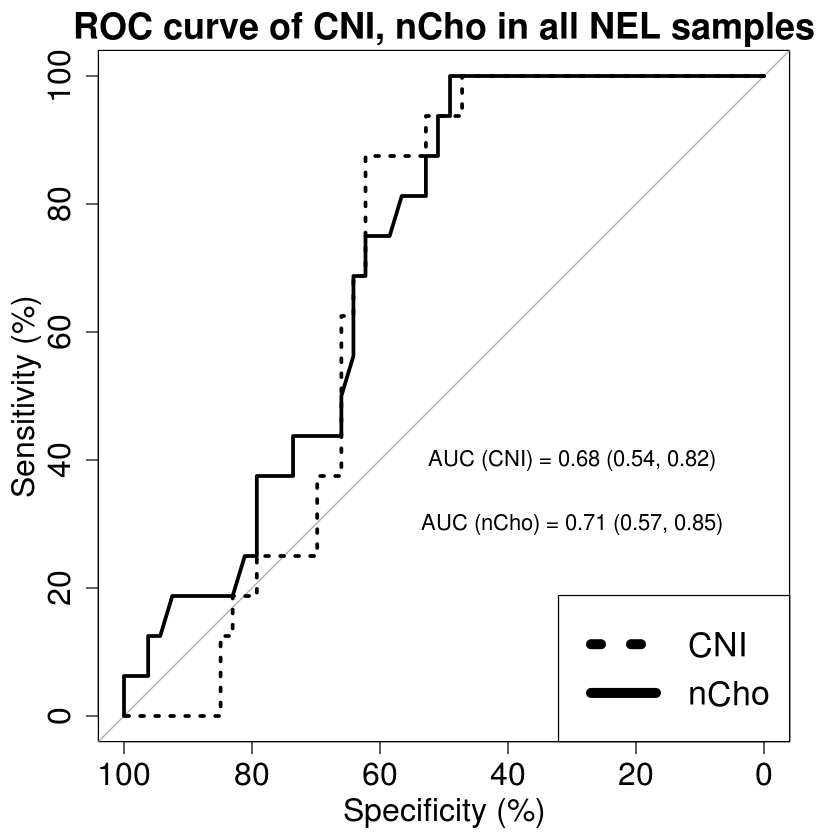

In [31]:
fold = 1
data_thresh = data_nel[which(data_nel$fold != fold),]
par(cex.axis=1.6, cex.lab=1.6, cex.main=1.8, cex.sub=1)

cni_roc = plot.roc(data_nel$outcome, data_nel[,'cni'], levels=c("rHGG", "txe"), 
          percent = TRUE, col = "#000001", main = "ROC curve of CNI, nCho in all NEL samples", lwd=3, lty = "dotted")
cho_roc = lines.roc(data_nel$outcome, data_nel$ncho, levels = c('rHGG', 'txe'), percent = TRUE, col = "#000000", lwd=3)
legend("bottomright", legend=c("CNI", "nCho"), col=c("#000001", "#000000"), lwd=8, lty = c("dotted", "solid"),cex = 1.7)
text(x = 30, y = 40, labels = paste('AUC (CNI) = ', round(cni_results['auc_4folds', 'mean'], 2), 
                                    " (",round(cni_results['ci1_4folds', 'mean'], 2) ,", ",
                                    round(cni_results['ci2_4folds', 'mean'], 2), ")", sep = ""), adj = NULL,
     pos = NULL, offset = 0.5, vfont = NULL,
     cex = 1.1, col = NULL, font = NULL)
text(x = 30, y = 30, labels = paste('AUC (nCho) = ', round(ncho_results['auc_4folds', 'mean'], 2), 
                                    " (",round(ncho_results['ci1_4folds', 'mean'], 2) ,", ",
                                    round(ncho_results['ci2_4folds', 'mean'], 2), ")", sep = ""), adj = NULL,
     pos = NULL, offset = 0.5, vfont = NULL,
     cex = 1.1, col = NULL, font = NULL)




## CEL

In [32]:
summary(data_cel$cbvn_nlin)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.010   1.143   1.615   1.899   2.370   5.720      56 

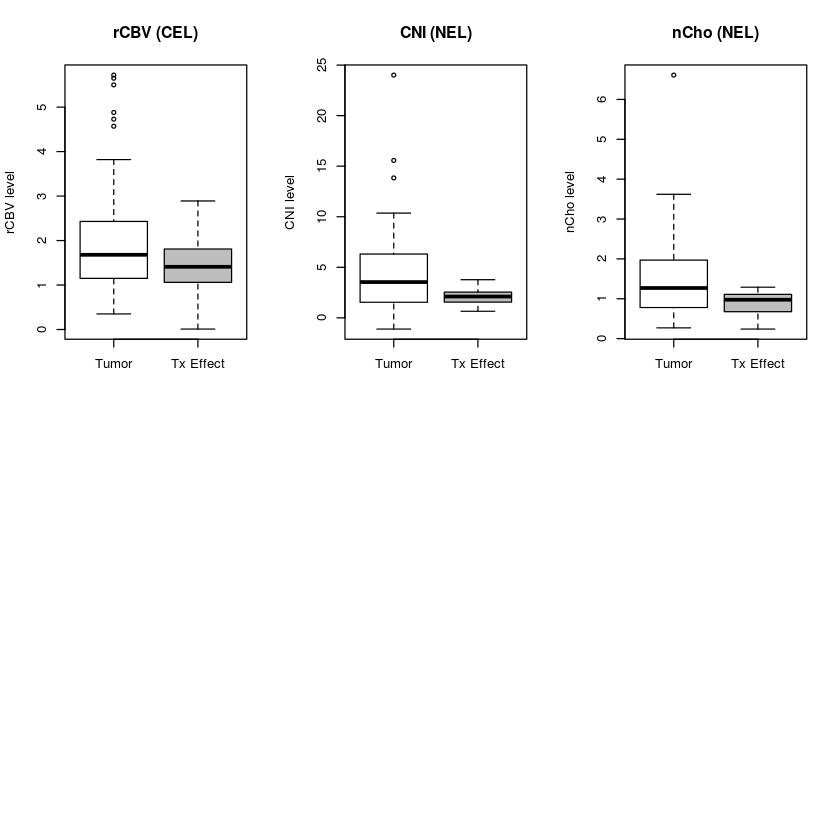

In [33]:
par(mfrow = c(2, 3))
boxplot(cbvn_nlin ~ outcome, data_cel, 
       main = "rCBV (CEL)", 
       names = c('Tumor', 'Tx Effect'),
       col = c('white', 'gray'), 
       ylab = 'rCBV level')

boxplot(cni ~ outcome, data_nel, 
       main = "CNI (NEL)", 
       names = c('Tumor', 'Tx Effect'),
       col = c('white', 'gray'), 
       ylab = 'CNI level')

boxplot(ncho ~ outcome, data_nel, 
       main = "nCho (NEL)", 
       names = c('Tumor', 'Tx Effect'),
       col = c('white', 'gray'), 
       ylab = 'nCho level')


In [34]:
scores_cel = data.frame(param = NA, 
                        folds = NA, 
                        thresh = NA,
                        auc_4folds = NA,
                        ci1_4folds = NA, 
                        ci2_4folds = NA,
                        
                        acc_4folds = NA,
                        sens_4folds = NA, 
                        spec_4folds = NA, 
                        ppv_4folds = NA,
                        npv_4folds = NA,
                        
                        acc_CV = NA,
                        sens_CV = NA, 
                        spec_CV = NA,
                        ppv_CV = NA,
                        npv_CV = NA,
                        auc_CV = NA,
                        ci1_cv = NA,
                        ci2_cv = NA
                       )

In [35]:
for (col in features_mri){
    for (fold in c(1:5)){
        data_thresh = data_cel[which(data_cel$fold != fold),]
        data_pred = data_cel[which(data_cel$fold == fold),]
        roc = roc(data_thresh$outcome, data_thresh[,col], levels=c("rHGG", "txe"))
#         print(col)
#         plot(roc)
        thresh = coords(roc, "best", best.method=c("closest.topleft"))['threshold']
        sens = coords(roc, "best", best.method=c("closest.topleft"))['sensitivity']
        spec = coords(roc, "best", best.method=c("closest.topleft"))['specificity']
        
        if(col == "nfa.1" | col == "nnaa"){
            preds_4folds = as.factor(ifelse(data_thresh[,col] < thresh, 'rHGG', 'txe'))
        }
        else{
            preds_4folds = as.factor(ifelse(data_thresh[,col] > thresh, 'rHGG', 'txe'))
        }
        acc_4folds =  confusionMatrix(data = preds_4folds, reference = data_thresh$outcome)$overall['Accuracy']
        ppv_4folds =  confusionMatrix(data = preds_4folds, reference = data_thresh$outcome)$byClass['Pos Pred Value']
        npv_4folds =  confusionMatrix(data = preds_4folds, reference = data_thresh$outcome)$byClass['Neg Pred Value']

        auc = auc(roc)
        ci1 = ci.auc(roc)[1]
        ci2 = ci.auc(roc)[3]
        
        if(col == "nfa.1" | col == "nnaa"){
            preds = as.factor(ifelse(data_pred[,col] < thresh, 'rHGG', 'txe'))
        }
        else{
            preds = as.factor(ifelse(data_pred[,col] > thresh, 'rHGG', 'txe'))
        }
        acc_pred =  confusionMatrix(data = preds, reference = data_pred$outcome)$overall['Accuracy']
        sens_pred = confusionMatrix(data = preds, reference = data_pred$outcome)$byClass['Sensitivity']
        spec_pred = confusionMatrix(data = preds, reference = data_pred$outcome)$byClass['Specificity']
        ppv_pred = confusionMatrix(data = preds, reference = data_pred$outcome)$byClass['Pos Pred Value']
        npv_pred = confusionMatrix(data = preds, reference = data_pred$outcome)$byClass['Neg Pred Value']
        
        outcome_pred_pruned = data_pred$outcome[!is.na(preds)]
        outcome_pred_pruned = ifelse(outcome_pred_pruned == 'rHGG', 1, 0)
        preds_pruned        = preds[!is.na(preds)]
        preds_pruned        = ifelse(preds_pruned == "rHGG", 1, 0)

        
        roc_pred = roc(outcome_pred_pruned, preds_pruned)
        auc_pred = auc(roc_pred)
        ci1_cv = ci.auc(roc_pred)[1]
        ci2_cv = ci.auc(roc_pred)[3]
        
        newline = c(param = col, 
                        folds = fold, 
                        thresh = thresh,
                        auc_4folds = auc,
                        ci1_4folds = ci1, 
                        ci2_4folds = ci2, 
                    
                        acc_4folds = acc_4folds,
                        sens_4folds = sens, 
                        spec_4folds = spec, 
                        ppv_4folds = ppv_4folds, 
                        npv_4folds = npv_4folds, 
                    
                        acc_CV = acc_pred,
                        sens_CV = sens_pred,
                        spec_CV = spec_pred, 
                        ppv_CV = ppv_pred, 
                        npv_CV = npv_pred,
                        auc_CV = auc_pred,
                        ci1_cv = ci1_cv,
                        ci2_cv = ci2_cv
                       )
        scores_cel = rbind(scores_cel, newline)

    }
}

In [36]:
for (col in colnames(scores_cel)[2:length(colnames(scores_cel))]){
    scores_cel[col] = as.numeric(unlist(scores_cel[col]))
}


In [37]:
scores_cel_cbv = scores_cel[scores_cel$param == "cbvn_nlin",]

In [38]:
scores_cel_cbv=scores_cel_cbv[-1,]

In [39]:
scores_cel_cbv

,param,folds,thresh,auc_4folds,ci1_4folds,ci2_4folds,acc_4folds,sens_4folds,spec_4folds,ppv_4folds,npv_4folds,acc_CV,sens_CV,spec_CV,ppv_CV,npv_CV,auc_CV,ci1_cv,ci2_cv
12,cbvn_nlin,1,1.245,0.5927230,0.4305397,0.7549063,0.6506024,0.5000000,0.6760563,0.8888889,0.2068966,0.6086957,0.6666667,0.4000000,0.8000000,0.25000000,0.5333333,0.26842643,0.7982402
13,cbvn_nlin,2,1.615,0.6436275,0.5003713,0.7868836,0.5783133,0.6666667,0.5588235,0.8837209,0.2500000,0.4347826,0.4285714,0.5000000,0.9000000,0.07692308,0.5357143,0.03386695,1.0000000
14,cbvn_nlin,3,1.615,0.6547619,0.5045246,0.8049992,0.5617978,0.7500000,0.5324675,0.9318182,0.2000000,0.4705882,0.5000000,0.4000000,0.6666667,0.25000000,0.5500000,0.26813416,0.8318658
15,cbvn_nlin,4,1.645,0.6034664,0.4559660,0.7509667,0.5609756,0.6428571,0.5441176,0.8809524,0.2250000,0.4583333,0.4285714,0.6666667,0.9000000,0.14285714,0.5476190,0.20342905,0.8918090
16,cbvn_nlin,5,1.830,0.6101852,0.4619098,0.7584606,0.4827586,0.7333333,0.4305556,0.8857143,0.2115385,0.5263158,0.4705882,1.0000000,1.0000000,0.18181818,0.7352941,0.61300849,0.8575797


In [40]:

cbv_results = data.frame(median = apply( scores_cel_cbv[,c(3:19)], 2, median),
           mean = apply( scores_cel_cbv[,c(3:19)], 2, mean), sd = apply(scores_cel_cbv[,c(3:19)], 2, sd))
cbv_results

,median,mean,sd
thresh,1.6150000,1.5900000,0.21266170
auc_4folds,0.6101852,0.6209528,0.02681340
ci1_4folds,0.4619098,0.4706623,0.03135158
ci2_4folds,0.7584606,0.7712433,0.02358769
acc_4folds,0.5617978,0.5668895,0.05974374
sens_4folds,0.6666667,0.6585714,0.09925459
spec_4folds,0.5441176,0.5484041,0.08741322
ppv_4folds,0.8857143,0.8942189,0.02121704
npv_4folds,0.2115385,0.2186870,0.01974638
acc_CV,0.4705882,0.4997431,0.06957264


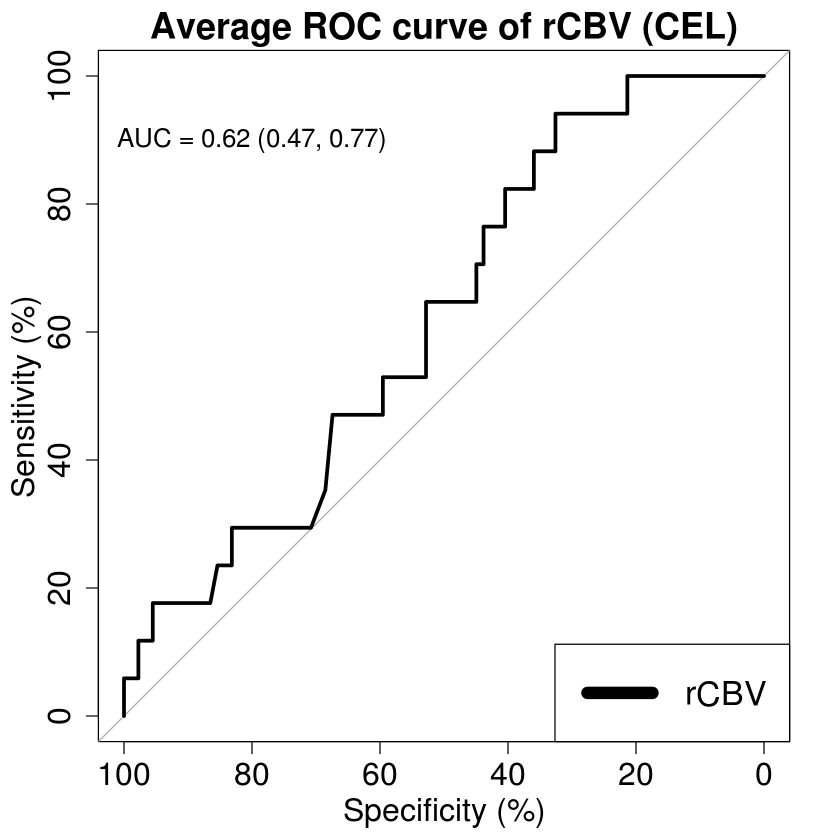

In [41]:
fold = 5
data_thresh = data_cel[which(data_cel$fold != fold),]
par(cex.axis=1.6, cex.lab=1.6, cex.main=1.8, cex.sub=1)
cbvn_nlin_roc = plot.roc(data_cel$outcome, data_cel[,'cbvn_nlin'], levels=c("rHGG", "txe"), 
          percent = TRUE, lwd=3, col = "#000000", main = "Average ROC curve of rCBV (CEL)" )
legend("bottomright", legend=c("rCBV"), col=c("#000000"), lwd=10, cex = 1.7)
text(x = 80, y = 90, labels = paste('AUC = ', round(cbv_results['auc_4folds', 'mean'], 2), 
                                    " (",round(cbv_results['ci1_4folds', 'mean'], 2) ,", ",
                                    round(cbv_results['ci2_4folds', 'mean'], 2), ")", sep = ""), adj = NULL,
     pos = NULL, offset = 0.5, vfont = NULL,
     cex = 1.3, col = NULL, font = NULL)

## All 

In [42]:
scores_all = data.frame(param = NA, 
                        folds = NA, 
                        thresh = NA,
                        sens_4folds = NA, 
                        spec_4folds = NA, 
                        sens_CV = NA, 
                        spec_CV = NA
                       )

In [43]:
for (col in features_mri){
    for (fold in c(1:5)){
        data_thresh = data[which(data$fold != fold),]
        data_pred = data[which(data$fold == fold),]
        roc = roc(data_thresh$outcome, data_thresh[,col], levels=c("rHGG", "txe"))
        thresh = coords(roc, "best", best.method=c("closest.topleft"))['threshold']
        sens = coords(roc, "best", best.method=c("closest.topleft"))['sensitivity']
        spec = coords(roc, "best", best.method=c("closest.topleft"))['specificity']
        
        if(col == "nfa.1" | col == "nnaa"){
            preds = as.factor(ifelse(data_pred[,col] < thresh, 'rHGG', 'txe'))
        }
        else{
            preds = as.factor(ifelse(data_pred[,col] > thresh, 'rHGG', 'txe'))
        }
        sens_pred = confusionMatrix(data = preds, reference = data_pred$outcome)$byClass['Sensitivity']
        spec_pred = confusionMatrix(data = preds, reference = data_pred$outcome)$byClass['Specificity']
        
        newline = c(param = col, 
                        folds = fold, 
                        thresh = thresh,
                        sens_4folds = sens, 
                        spec_4folds = spec, 
                        sens_CV = sens_pred, 
                        spec_CV = spec_pred
                       )
        scores_all = rbind(scores_all, newline)

    }
}



In [44]:
head(scores_all)

param,folds,thresh,sens_4folds,spec_4folds,sens_CV,spec_CV
NA,NA,NA,NA,NA,NA,NA
nadc.1,1,1.595,0.625,0.549707602339181,0.48780487804878,0.3125
nadc.1,2,1.595,0.51063829787234,0.548192771084337,0.5,0.647058823529412
nadc.1,3,1.595,0.538461538461538,0.52046783625731,0.609756097560976,0.583333333333333
nadc.1,4,1.645,0.490566037735849,0.545454545454545,0.425531914893617,0.818181818181818
nadc.1,5,1.595,0.571428571428571,0.52,0.621621621621622,0.375
